In [1]:
import os
import numpy as np
from matplotlib import pyplot

In [35]:
import numpy
filename = 'Stores.csv'
raw_data = open(filename)
data = numpy.loadtxt(raw_data, delimiter=",",skiprows=1)
print(data.shape)
print(data)
X, y = data[:, 1], data[:,2]
m = y.size

(896, 5)
[[1.000e+00 1.659e+03 1.961e+03 5.300e+02 6.649e+04]
 [2.000e+00 1.461e+03 1.752e+03 2.100e+02 3.982e+04]
 [3.000e+00 1.340e+03 1.609e+03 7.200e+02 5.401e+04]
 ...
 [8.940e+02 1.200e+03 1.436e+03 1.060e+03 7.644e+04]
 [8.950e+02 1.299e+03 1.560e+03 7.700e+02 9.661e+04]
 [8.960e+02 1.174e+03 1.429e+03 1.110e+03 5.434e+04]]


In [36]:
X

array([1659., 1461., 1340., 1451., 1770., 1442., 1542., 1261., 1090.,
       1030., 1187., 1751., 1746., 1615., 1469., 1644., 1578., 1703.,
       1438., 1940., 1421., 1458., 1719., 1449., 1234., 1732., 1475.,
       1390., 1642., 1715., 1439., 1250., 1331., 1784., 1375., 1871.,
       1442., 1174., 1839., 1270., 1435.,  965., 1665., 1780., 1009.,
       1227., 1769., 1660., 1472., 1408., 1514., 1565., 1074., 1864.,
       1570., 1417., 1734., 1470., 1761., 1756., 1704., 2011., 1472.,
       1310., 1544., 1707., 1881., 1416., 1631., 1318., 1692., 1152.,
        891., 1468., 1539., 1635., 1267., 1250., 1720., 1462., 1431.,
       1539., 1441., 1572., 1287., 1468., 1931., 1252., 1238., 1479.,
       1590., 2169., 1838., 1385., 1921., 1975., 1853., 1816., 1785.,
       1579., 1096., 1919., 1262., 1374., 1309., 1207., 1692., 1929.,
       1573., 1415., 1162., 1485., 1897., 1607., 1909., 1274., 1157.,
       1712., 1500., 1682., 1441., 1525., 1408., 1947., 1164., 1787.,
       1871., 1718.,

In [44]:
# Leer datos
filename = 'Stores.csv'
raw_data = open(filename)
data = numpy.loadtxt(raw_data, delimiter=",",skiprows=1)
#data = np.loadcsv('Stores.csv', delimiter=',')
X, y = data[:, 3], data[:,4]
m = y.size

In [49]:
print(data)
print(X)
print(y)

[[1.000e+00 1.659e+03 1.961e+03 5.300e+02 6.649e+04]
 [2.000e+00 1.461e+03 1.752e+03 2.100e+02 3.982e+04]
 [3.000e+00 1.340e+03 1.609e+03 7.200e+02 5.401e+04]
 ...
 [8.940e+02 1.200e+03 1.436e+03 1.060e+03 7.644e+04]
 [8.950e+02 1.299e+03 1.560e+03 7.700e+02 9.661e+04]
 [8.960e+02 1.174e+03 1.429e+03 1.110e+03 5.434e+04]]
[ 530.  210.  720.  620.  450.  760. 1030. 1020.  680. 1130. 1090.  720.
 1050. 1160.  770.  790. 1440.  670. 1030.  980.  370.  690.  950.  620.
  840.  820. 1100.  980.  710.  650.  990.  990.  880.  620. 1020.  700.
  610. 1080. 1010.   10. 1250.  600.  730.  780.  520.  870.  690.  910.
 1260. 1040.  910. 1300.  320.  530.  980.  740. 1240. 1080. 1080.  460.
  300.  530.  600.  860.  590.  920.  570.  290.  650.  710.  850.  530.
  630.  700.  650.  720.  450. 1390.  960.  600.  620. 1020.  330. 1410.
 1200.  280.  940.  850.  960.  420.  830.  600.  400.  760. 1470.  500.
 1120. 1160.  820. 1140.  900.  760. 1170. 1080. 1000.  690.  810.  630.
  650.  920. 1260. 

In [50]:
def graficarDatos(x, y):
  fig = pyplot.figure()
  pyplot.plot(x, y, 'ro')
  pyplot.xlabel('Recuento diario de clientes')
  pyplot.ylabel('Ventas en Tienda')

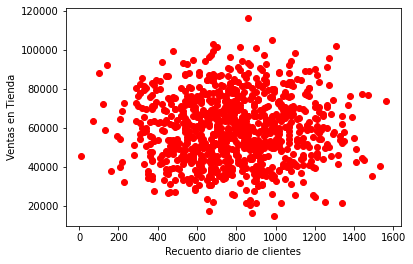

In [51]:
graficarDatos(X, y)

In [52]:
# No olvidarse agregar unos a la matriz de x
X = np.stack([np.ones(m), X], axis=1)

In [53]:
X

array([[1.00e+00, 5.30e+02],
       [1.00e+00, 2.10e+02],
       [1.00e+00, 7.20e+02],
       ...,
       [1.00e+00, 1.06e+03],
       [1.00e+00, 7.70e+02],
       [1.00e+00, 1.11e+03]])

In [54]:
def calcularCosto(X, y, theta):
  m = y.size
  J = 0
  h = np.dot(X, theta)
  # print(h)
  J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
  return J

In [55]:
theta=np.array([0.1, 2.8])
JJ = calcularCosto(X, y, theta)
print(f"con theta:{ theta } se obtiene un costo de: {JJ}")

con theta:[0.1 2.8] se obtiene un costo de: 1780789936.059241


In [56]:
def calcularDescensoGradiente(X, y, theta, alpha, numero_iteraciones):
  m = y.shape[0]
  theta = theta.copy()
  J_historico = []

  for i in range(numero_iteraciones):
    theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
    J_historico.append(calcularCosto(X, y, theta))

  return theta, J_historico

In [57]:
theta = np.zeros(2)

num_ite = 80
alpha = 0.003

theta, J_historico = calcularDescensoGradiente(X, y, theta, alpha, num_ite)
print(f"los valores de theta calculados son: { theta }")
print(f"con un costo de: { J_historico[-1]} ")

los valores de theta calculados son: [-1.21421185e+264 -1.06342846e+267]
con un costo de: inf 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in square
  
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


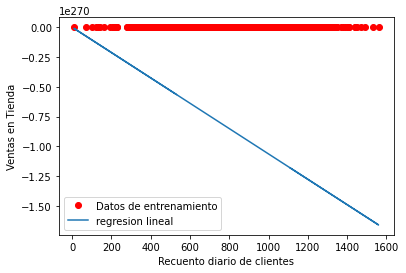

In [58]:
graficarDatos(X[:, 1], y)
pyplot.plot(X[:,1], np.dot(X, theta), '-')
pyplot.legend(['Datos de entrenamiento', 'regresion lineal'])

In [59]:
y_pred = np.dot([1, 18.3], theta)
print(y_pred)

-1.9461954989298886e+268
